In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
dicts = pickle.load(open("ResNet34_res_256_fold200129500_simulation_results.p","rb"))
#dicts = pickle.load(open("ResNet34__fold600029500_simulation_results.p","rb"))


In [71]:
seed=[]
lb=[]
for i in tqdm(range(len(dicts))):
    seed.append(i)
    lb.append(np.array(dicts[i*500][0])[:,2].mean())
seed=np.array(seed)

100%|██████████| 100/100 [00:00<00:00, 6443.06it/s]


In [72]:
public=np.array(dicts[49500][0])[:,2]
public.sort()
private=np.array(dicts[49500][1])[:,2]
private.sort()
public_mean = public.mean()*np.ones(seed.shape)
private_mean = private.mean()*np.ones(seed.shape)

'\nline1, = ax.semilogy(public)\nline2, = ax.semilogy(private)\nline3, = ax.semilogy(pub_mean)\nline4, = ax.semilogy(private_mean)\n\nplt.plot(seed, public)\nplt.plot(seed,private)\nplt.plot(seed,pub_mean)\nplt.plot(seed,private_mean)\n'

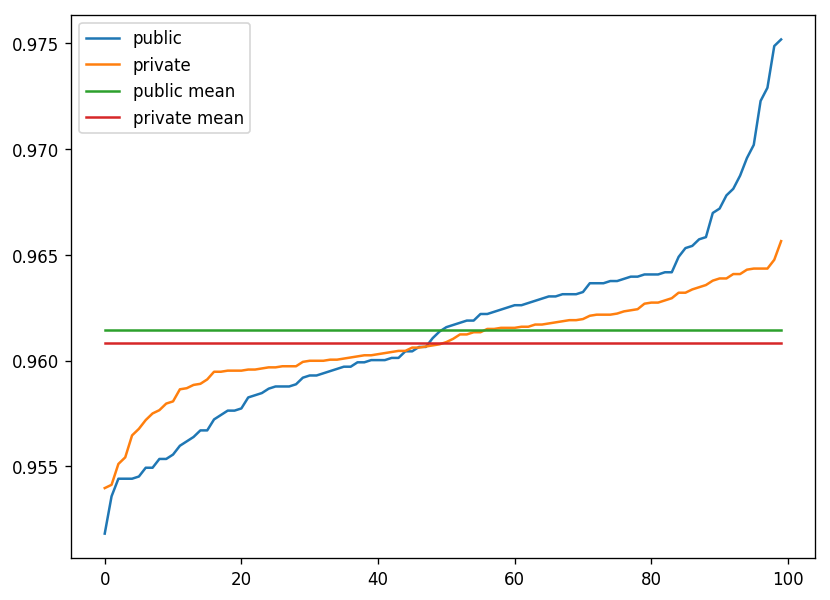

In [73]:
fig = plt.figure(num=None, figsize=(8, 6), dpi=120, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1,1,1)

line1, = ax.plot(public,label="public")
line2, = ax.plot(private,label="private")
line3, = ax.plot(public_mean,label="public mean")
line4, = ax.plot(private_mean,label="private mean")
plt.legend()
"""
line1, = ax.semilogy(public)
line2, = ax.semilogy(private)
line3, = ax.semilogy(pub_mean)
line4, = ax.semilogy(private_mean)

plt.plot(seed, public)
plt.plot(seed,private)
plt.plot(seed,pub_mean)
plt.plot(seed,private_mean)
"""

In [74]:
diff = private-public
diff.sort()
diff_mean = diff.mean()*np.ones(seed.shape)
print(np.std(private))
print(np.std(public))

0.002243451
0.0044892277


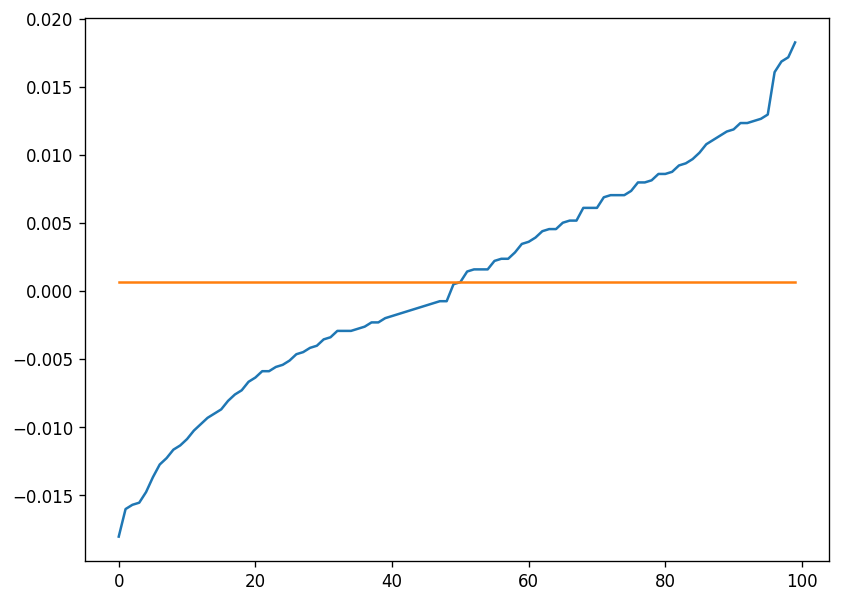

In [61]:
fig2 = plt.figure(num=None, figsize=(8, 6), dpi=120, facecolor='w', edgecolor='k')
ax2 = fig2.add_subplot(1,1,1)
line1, = ax2.plot(diff)
line2, = ax2.plot(diff_mean)

In [62]:
from scipy import stats
k2,p=stats.normaltest(diff)
alpha = 1e-3
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
     print("The null hypothesis can be rejected")
else:
     print("The null hypothesis cannot be rejected")

p = 0.146939
The null hypothesis cannot be rejected


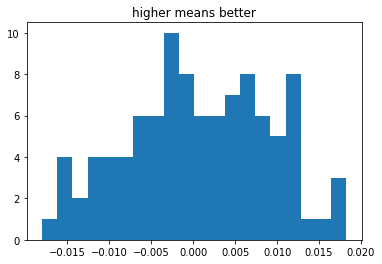

In [63]:
plt.hist(diff, bins=20)  # arguments are passed to np.histogram
plt.title("higher means better")
plt.show()

In [52]:
var = np.var(diff)
mean=diff.mean()
std = np.std(diff)

In [53]:
var/(0.005-mean)**2 #well, chebyshev's inequality didn't help

1.4518262506404598

In [54]:
mean

-0.0005876678

In [55]:
std

0.006732679